In [1]:
from urllib.request import urlopen, Request
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from urllib.request import urlopen
from matplotlib import pyplot as plt
import math
import datetime
from time import sleep
import copy
import json
import sys
import csv
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr   
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.utils import shuffle
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns; sns.set(color_codes=True)
from statsmodels.stats.stattools import durbin_watson
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("data_f.csv")

In [ ]:
dftf = df.copy()
df['target'] = np.append(np.diff(df['close_price']), 0)
dftf['rise/fall'] = np.where(df['target']>=0, 'Rise', 'Fall')
ax = sns.countplot(dftf['rise/fall'])
ax.set_title('Distribúcia nárastov a poklesov ceny Bitcoinu', fontsize = 15)
ax.set_ylabel("Početnosť") 
ax.set_xlabel("log(tweet_volume)") 
plt.show()

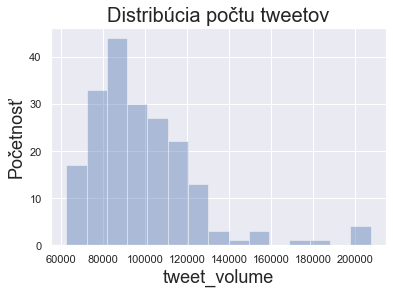

In [3]:
ax = sns.distplot((df.tweet_volume), kde=False, norm_hist=False)
ax.set_title('Distribúcia počtu tweetov', fontsize = 20)
ax.set_ylabel("Početnosť", fontsize = 18) 
ax.set_xlabel("tweet_volume", fontsize = 18) 
plt.show()

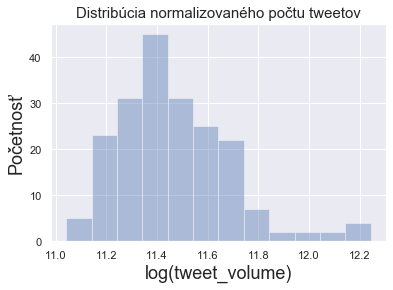

In [4]:
ax = sns.distplot(np.log(df.tweet_volume), kde=False, norm_hist=False)
ax.set_title('Distribúcia normalizovaného počtu tweetov', fontsize = 15)
ax.set_ylabel("Početnosť", fontsize = 18) 
ax.set_xlabel("log(tweet_volume)", fontsize = 18) 
plt.show()

Text(0.5, 0, 'tweet_volume')

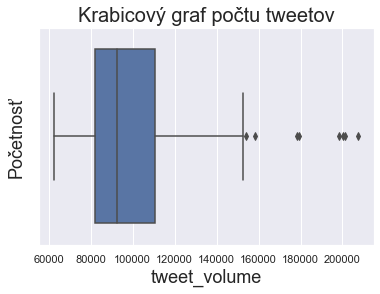

In [6]:
ax = sns.boxplot(x=(df.tweet_volume))
ax.set_title('Krabicový graf počtu tweetov', fontsize = 20)
ax.set_ylabel("Početnosť", fontsize = 18) 
ax.set_xlabel("tweet_volume", fontsize = 18) 

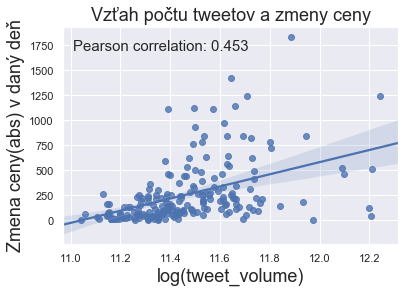

In [9]:
df = pd.read_csv("data_f.csv")
a = "Pearson correlation: %.3f" % np.log(df['tweet_volume']).corr((np.abs(df.close_price-df.open_price)))
x = np.log(df.tweet_volume)
y = (np.abs(df.close_price-df.open_price))
x, y = pd.Series(x, name="log(tweet_volume)"), pd.Series(y, name="Zmena ceny v daný deň")
ax = sns.regplot(x=x, y=y)
ax.set_title('Vzťah počtu tweetov a zmeny ceny', fontsize = 18)
ax.text(11.01, 1700.0,a, fontsize=15)
ax.set_ylabel("Zmena ceny(abs) v daný deň", fontsize = 18) 
ax.set_xlabel("log(tweet_volume)", fontsize = 18) 
plt.show()

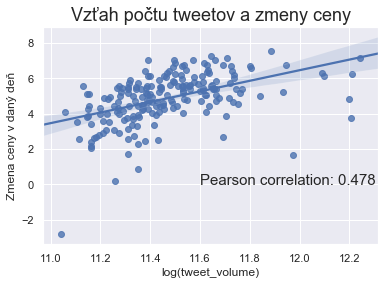

In [35]:
df = pd.read_csv("data_f.csv")
a = "Pearson correlation: %.3f" % np.log(df['tweet_volume']).corr(np.log(np.abs(df.close_price-df.open_price)))
x = np.log(df.tweet_volume)
y = np.log(np.abs(df.close_price-df.open_price))
x, y = pd.Series(x, name="log(tweet_volume)"), pd.Series(y, name="Zmena ceny v daný deň")
ax = sns.regplot(x=x, y=y)
ax.set_title('Vzťah počtu tweetov a zmeny ceny', fontsize = 18)
ax.text(11.6, 0.0,a, fontsize=15)
ax.set_ylabel("Zmena ceny(abs) v daný deň", fontsize = 18) 
ax.set_xlabel("tweet_volume", fontsize = 18) 
plt.show()

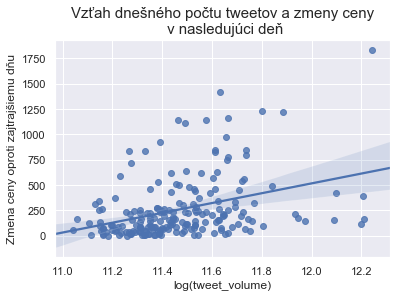

In [3]:
x = np.log(df.tweet_volume)
y = np.abs(np.append(np.diff(df['close_price']), 0))
x, y = pd.Series(x, name="log(tweet_volume)"), pd.Series(y, name="Zmena ceny oproti zajtrajšiemu dňu")
ax = sns.regplot(x=x, y=y).set_title('Vzťah dnešného počtu tweetov a zmeny ceny\n v nasledujúci deň', fontsize = 15)

In [21]:
df.tweet_volume.sum()

19564852

(199, 32)


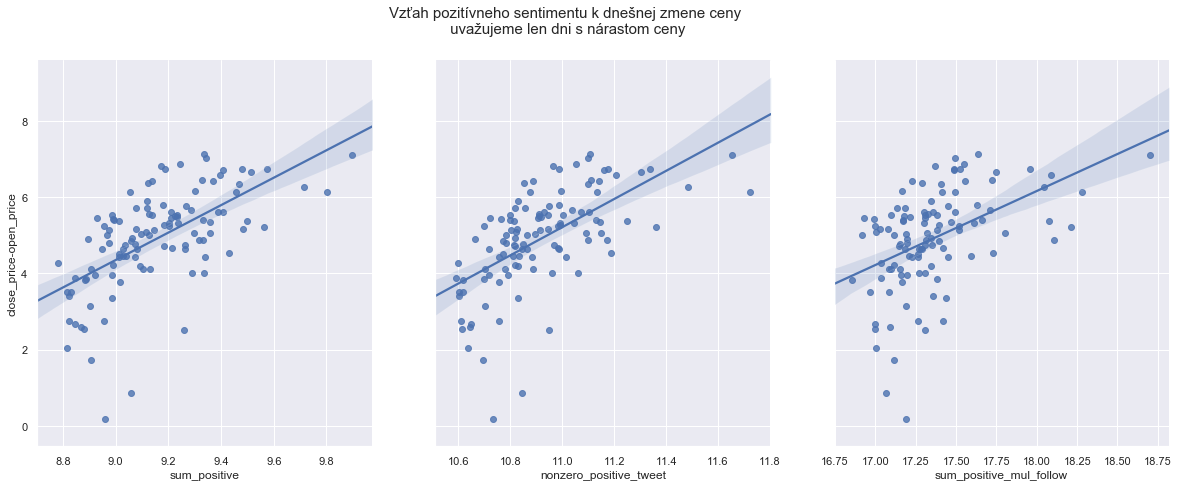

In [70]:
df = pd.read_csv("data_f.csv")
dft = df[['date', 'close_price','tweet_volume', 'nonzero_neutral_tweet', 'nonzero_positive_tweet', 'nonzero_negative_tweet', 'nonzero_compound_tweet', 'sum_positive_mul_follow', 'sum_neutral_mul_follow', 'sum_negative_mul_follow', 'sum_compound_mul_follow', 'sum_positive', 'sum_neutral', 'sum_negative', 'sum_compound', 'avg_sum_positive', 'avg_sum_neutral', 'avg_sum_negative', 'avg_sum_compound', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_neutral', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_compound', 'avg_sum_positive_mul_follow', 'avg_sum_neutral_mul_follow', 'avg_sum_negative_mul_follow', 'avg_sum_compound_mul_follow', 'avg_sum_nonzero_positive_mul_follow', 'avg_sum_nonzero_neutral_mul_follow', 'avg_sum_nonzero_negative_mul_follow', 'avg_sum_nonzero_compound_mul_follow']].copy()
dft['close_price-open_price']= df.close_price-df.open_price
print(dft.shape)
dff = dft.loc[dft['close_price-open_price'] >= 1.0]

dfth = dff[['close_price-open_price','sum_positive','nonzero_positive_tweet', 'sum_positive_mul_follow', 'avg_sum_positive', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_positive_mul_follow']].copy()
dfth['close_price-open_price'] = np.log(dfth['close_price-open_price'])
dfth.sum_positive = np.log(dfth.sum_positive)
dfth.nonzero_positive_tweet = np.log(dfth.nonzero_positive_tweet)    
dfth.sum_positive_mul_follow = np.log(dfth.sum_positive_mul_follow)  
g = sns.pairplot(data=dfth,
                y_vars =['close_price-open_price'],
                x_vars =['sum_positive', 'nonzero_positive_tweet', 'sum_positive_mul_follow'],
                kind="reg")
g.fig.suptitle("Vzťah pozitívneho sentimentu k dnešnej zmene ceny\n uvažujeme len dni s nárastom ceny", y=1.01, fontsize =15)

g.fig.set_size_inches(18,8)

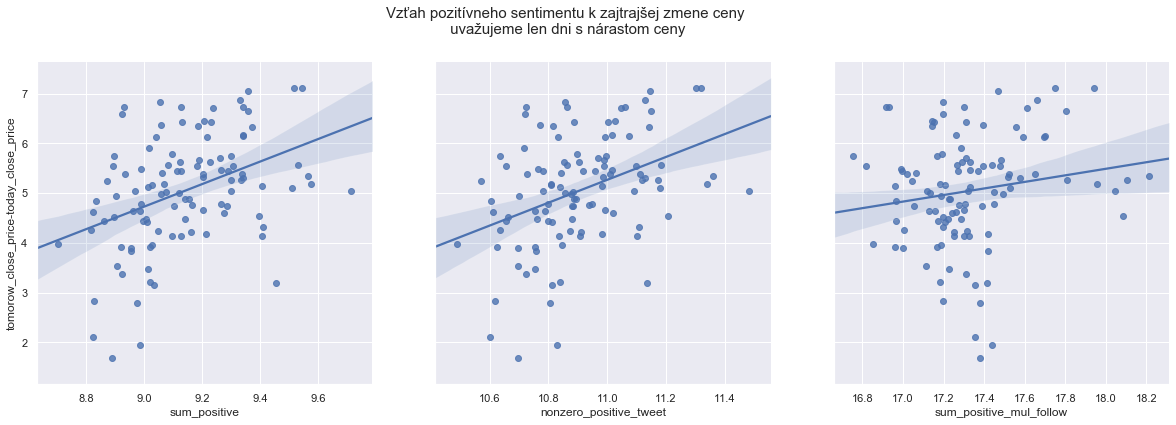

In [71]:
df = pd.read_csv("data_f.csv")
dft = df[['date', 'close_price','tweet_volume', 'nonzero_neutral_tweet', 'nonzero_positive_tweet', 'nonzero_negative_tweet', 'nonzero_compound_tweet', 'sum_positive_mul_follow', 'sum_neutral_mul_follow', 'sum_negative_mul_follow', 'sum_compound_mul_follow', 'sum_positive', 'sum_neutral', 'sum_negative', 'sum_compound', 'avg_sum_positive', 'avg_sum_neutral', 'avg_sum_negative', 'avg_sum_compound', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_neutral', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_compound', 'avg_sum_positive_mul_follow', 'avg_sum_neutral_mul_follow', 'avg_sum_negative_mul_follow', 'avg_sum_compound_mul_follow', 'avg_sum_nonzero_positive_mul_follow', 'avg_sum_nonzero_neutral_mul_follow', 'avg_sum_nonzero_negative_mul_follow', 'avg_sum_nonzero_compound_mul_follow']].copy()
dft['tomorow_close_price-today_close_price']= np.append(np.diff(df['close_price']), 0)
dff = dft.loc[dft['tomorow_close_price-today_close_price'] >= 1.0]

dfth = dff[['tomorow_close_price-today_close_price','sum_positive','nonzero_positive_tweet', 'sum_positive_mul_follow', 'avg_sum_positive', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_positive_mul_follow']].copy()
dfth['tomorow_close_price-today_close_price'] = np.log(dfth['tomorow_close_price-today_close_price'])
dfth.sum_positive = np.log(dfth.sum_positive)
dfth.nonzero_positive_tweet = np.log(dfth.nonzero_positive_tweet)    
dfth.sum_positive_mul_follow = np.log(dfth.sum_positive_mul_follow)  
g = sns.pairplot(data=dfth,
                y_vars =['tomorow_close_price-today_close_price'],
                x_vars =['sum_positive', 'nonzero_positive_tweet', 'sum_positive_mul_follow'],
                kind="reg")
g.fig.suptitle("Vzťah pozitívneho sentimentu k zajtrajšej zmene ceny\n uvažujeme len dni s nárastom ceny", y=0.8, fontsize =15)

g.fig.set_size_inches(18,10)

C:\Users\kriza\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Pearson correlation: 0.230
Pearson correlation: 0.142
Pearson correlation: 0.380


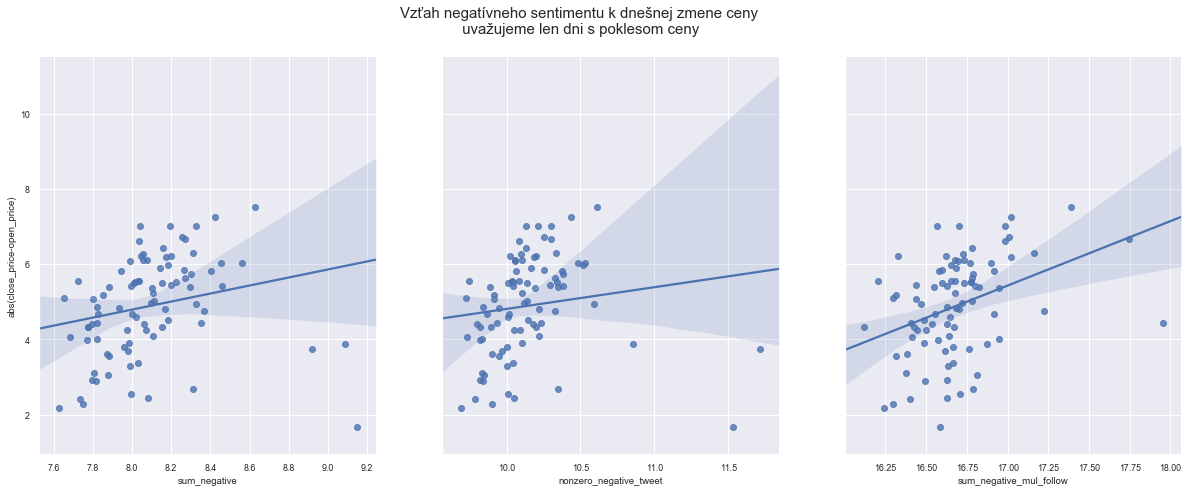

In [88]:
df = pd.read_csv("data_f.csv")
dft = df[['date','open_price', 'close_price','tweet_volume', 'nonzero_neutral_tweet', 'nonzero_positive_tweet', 'nonzero_negative_tweet', 'nonzero_compound_tweet', 'sum_positive_mul_follow', 'sum_neutral_mul_follow', 'sum_negative_mul_follow', 'sum_compound_mul_follow', 'sum_positive', 'sum_neutral', 'sum_negative', 'sum_compound', 'avg_sum_positive', 'avg_sum_neutral', 'avg_sum_negative', 'avg_sum_compound', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_neutral', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_compound', 'avg_sum_positive_mul_follow', 'avg_sum_neutral_mul_follow', 'avg_sum_negative_mul_follow', 'avg_sum_compound_mul_follow', 'avg_sum_nonzero_positive_mul_follow', 'avg_sum_nonzero_neutral_mul_follow', 'avg_sum_nonzero_negative_mul_follow', 'avg_sum_nonzero_compound_mul_follow']].copy()
dft['abs(close_price-open_price)']= dft.close_price-df.open_price
dff = dft.loc[dft['abs(close_price-open_price)'] <= -1.0]
dff['abs(close_price-open_price)'] = np.abs(dff['abs(close_price-open_price)'])

dfth = dff[['abs(close_price-open_price)','sum_negative','nonzero_negative_tweet', 'sum_negative_mul_follow', 'avg_sum_negative', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_negative_mul_follow']].copy()
dfth['abs(close_price-open_price)'] = np.log(dfth['abs(close_price-open_price)'])
dfth.sum_negative = np.log(dfth.sum_negative)
dfth.nonzero_negative_tweet = np.log(dfth.nonzero_negative_tweet)    
dfth.sum_negative_mul_follow = np.log(dfth.sum_negative_mul_follow)  
g = sns.pairplot(data=dfth,
                y_vars =['abs(close_price-open_price)'],
                x_vars =['sum_negative', 'nonzero_negative_tweet', 'sum_negative_mul_follow'],
                kind="reg")
g.fig.suptitle("Vzťah negatívneho sentimentu k dnešnej zmene ceny\n uvažujeme len dni s poklesom ceny", y=1.01, fontsize =15)

g.fig.set_size_inches(18,8)
print("Pearson correlation: %.3f" % dfth['abs(close_price-open_price)'].corr(dfth.sum_negative))
print("Pearson correlation: %.3f" % dfth['abs(close_price-open_price)'].corr(dfth.nonzero_negative_tweet))
print("Pearson correlation: %.3f" % dfth['abs(close_price-open_price)'].corr(dfth.sum_negative_mul_follow))

C:\Users\kriza\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Pearson correlation: 0.353
Pearson correlation: 0.335
Pearson correlation: 0.162


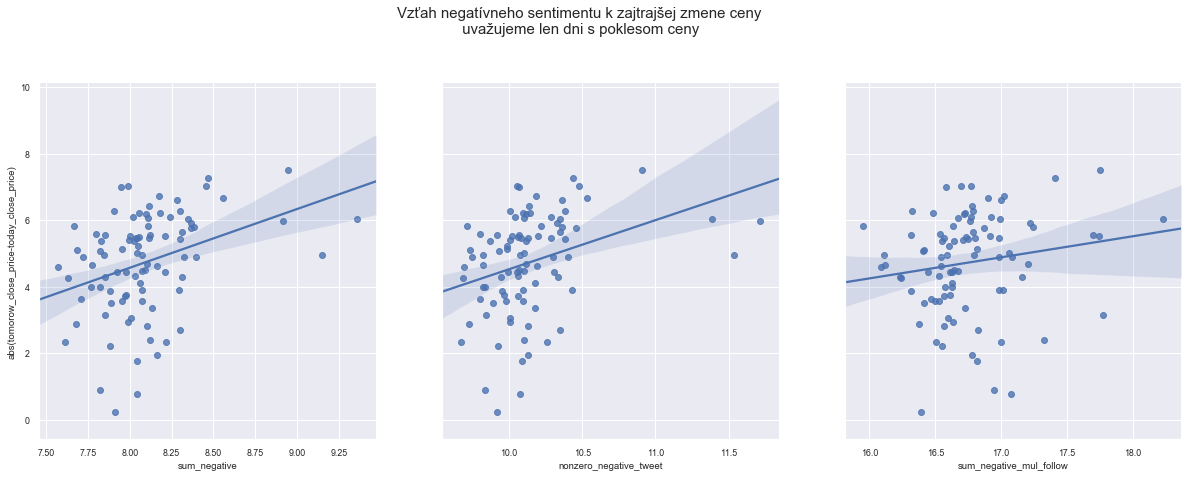

In [92]:
df = pd.read_csv("data_f.csv")
dft = df[['date', 'close_price','tweet_volume', 'nonzero_neutral_tweet', 'nonzero_positive_tweet', 'nonzero_negative_tweet', 'nonzero_compound_tweet', 'sum_positive_mul_follow', 'sum_neutral_mul_follow', 'sum_negative_mul_follow', 'sum_compound_mul_follow', 'sum_positive', 'sum_neutral', 'sum_negative', 'sum_compound', 'avg_sum_positive', 'avg_sum_neutral', 'avg_sum_negative', 'avg_sum_compound', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_neutral', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_compound', 'avg_sum_positive_mul_follow', 'avg_sum_neutral_mul_follow', 'avg_sum_negative_mul_follow', 'avg_sum_compound_mul_follow', 'avg_sum_nonzero_positive_mul_follow', 'avg_sum_nonzero_neutral_mul_follow', 'avg_sum_nonzero_negative_mul_follow', 'avg_sum_nonzero_compound_mul_follow']].copy()
dft['abs(tomorow_close_price-today_close_price)']= np.append(np.diff(df['close_price']), 0)
dff = dft.loc[dft['abs(tomorow_close_price-today_close_price)'] <= -1.0]
dff['abs(tomorow_close_price-today_close_price)'] = np.abs(dff['abs(tomorow_close_price-today_close_price)'])

dfth = dff[['abs(tomorow_close_price-today_close_price)','sum_negative','nonzero_negative_tweet', 'sum_negative_mul_follow', 'avg_sum_negative', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_negative_mul_follow']].copy()
dfth['abs(tomorow_close_price-today_close_price)'] = np.log(dfth['abs(tomorow_close_price-today_close_price)'])
dfth.sum_negative = np.log(dfth.sum_negative)
dfth.nonzero_negative_tweet = np.log(dfth.nonzero_negative_tweet)    
dfth.sum_negative_mul_follow = np.log(dfth.sum_negative_mul_follow)  
g = sns.pairplot(data=dfth,
                y_vars =['abs(tomorow_close_price-today_close_price)'],
                x_vars =['sum_negative', 'nonzero_negative_tweet', 'sum_negative_mul_follow'],
                kind="reg")
g.fig.suptitle("Vzťah negatívneho sentimentu k zajtrajšej zmene ceny\n uvažujeme len dni s poklesom ceny", y=0.9, fontsize =15)

g.fig.set_size_inches(18,9)
print("Pearson correlation: %.3f" % dfth['abs(tomorow_close_price-today_close_price)'].corr(dfth.sum_negative))
print("Pearson correlation: %.3f" % dfth['abs(tomorow_close_price-today_close_price)'].corr(dfth.nonzero_negative_tweet))
print("Pearson correlation: %.3f" % dfth['abs(tomorow_close_price-today_close_price)'].corr(dfth.sum_negative_mul_follow))

Text(0.5, 1, 'Korelačné zobrazenie pre twitter atribúty \n Pearsonov koeficient')

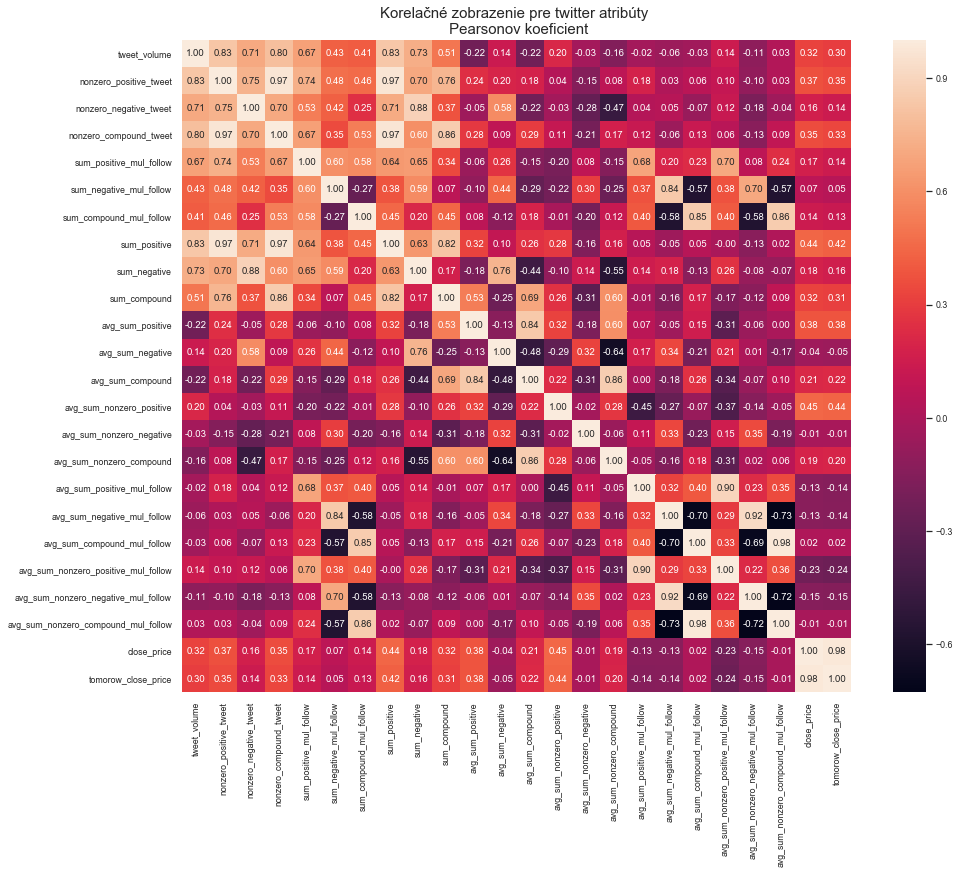

In [37]:
df = pd.read_csv("data_f.csv")
dft = df[['tweet_volume', 'nonzero_positive_tweet', 'nonzero_negative_tweet', 'nonzero_compound_tweet', 'sum_positive_mul_follow','sum_negative_mul_follow', 'sum_compound_mul_follow', 'sum_positive', 'sum_negative', 'sum_compound', 'avg_sum_positive', 'avg_sum_negative', 'avg_sum_compound', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_compound', 'avg_sum_positive_mul_follow', 'avg_sum_negative_mul_follow', 'avg_sum_compound_mul_follow', 'avg_sum_nonzero_positive_mul_follow', 'avg_sum_nonzero_negative_mul_follow', 'avg_sum_nonzero_compound_mul_follow']].copy()
dft['close_price'] = df.close_price.copy()
dft['tomorow_close_price'] = dft['close_price'].shift(-1)
#dft['tomorow_close_price-today_close_price']= np.append(np.diff(df['close_price']), 0)


fig, ax = plt.subplots(figsize=(15,12))
ax=sns.heatmap(dft.corr(), ax=ax, annot=True, fmt=".2f")
sns.set(font_scale=0.8)
ax.set_title('Korelačné zobrazenie pre twitter atribúty \n Pearsonov koeficient', fontsize = 15)


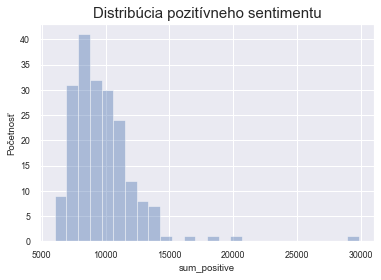

In [110]:
ax = sns.distplot(dft.sum_positive, kde=False, norm_hist=False)
ax.set_title('Distribúcia pozitívneho sentimentu', fontsize = 15)
ax.set_ylabel("Početnosť") 
ax.set_xlabel("sum_positive") 
plt.show()

Pearson correlation: 0.421


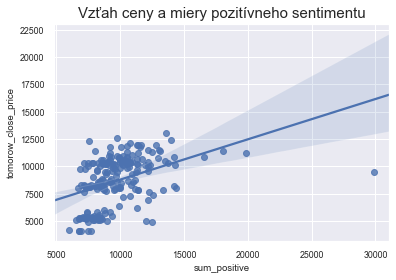

In [114]:
x = (dft.sum_positive)
y = (dft.tomorow_close_price)
ax = sns.regplot(x=x, y = y ).set_title('Vzťah ceny a miery pozitívneho sentimentu', fontsize = 15)
print("Pearson correlation: %.3f" % x.corr(y))

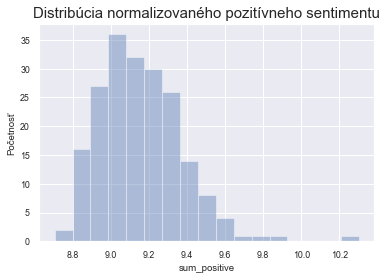

In [120]:
ax = sns.distplot(np.log(dft.sum_positive), kde=False, norm_hist=False)
ax.set_title('Distribúcia normalizovaného pozitívneho sentimentu', fontsize = 15)
ax.set_ylabel("Početnosť") 
ax.set_xlabel("sum_positive") 
plt.show()


Pearson correlation: 0.497


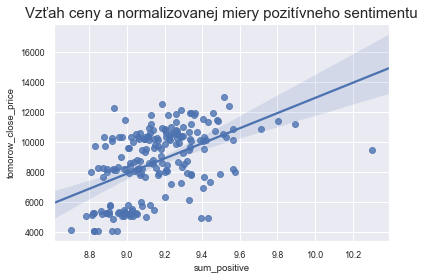

In [126]:
x = (np.log(dft.sum_positive))
y = ((dft.tomorow_close_price))
ax = sns.regplot(x=x, y = y ).set_title('Vzťah ceny a normalizovanej miery pozitívneho sentimentu', fontsize = 15)
print("Pearson correlation: %.3f" % x.corr(y))

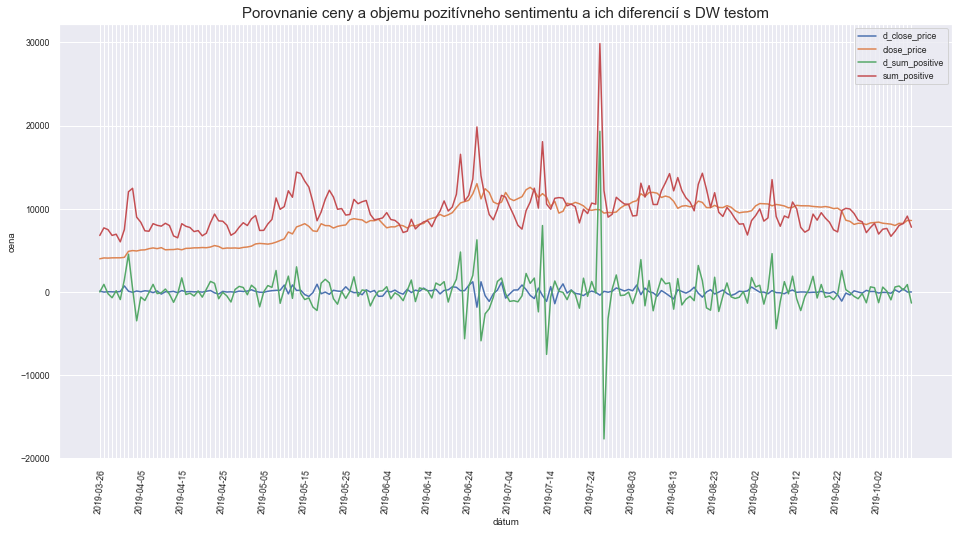

Durbin Watsonov test autokorelácie(close_price): 0.002
Durbin Watsonov test autokorelácie(d_close_price): 2.198
Durbin Watsonov test autokorelácie(sum_positive): 0.063
Durbin Watsonov test autokorelácie(d_sum_positive): 2.659


In [173]:
df = pd.read_csv("data_f.csv")
scaler = MinMaxScaler()
df['d_close_price']= np.append(np.diff(df['close_price']), 0)
df['d_sum_positive']= np.insert(np.diff(df['sum_positive']), 0, 0)


plt.figure(figsize=(16, 8))
#df['close_price'] = scaler.fit_transform(df[['close_price']])
#df['d_close_price'] = scaler.fit_transform(df[['d_close_price']])

g =sns.lineplot(df['date'], y=df['d_close_price'], label = 'd_close_price')
g =sns.lineplot(df['date'], y=df['close_price'], label = 'close_price')

g =sns.lineplot(df['date'], y=df['d_sum_positive'], label = 'd_sum_positive')
g =sns.lineplot(df['date'], y=df['sum_positive'], label = 'sum_positive')

plt.xticks(rotation='85')
g.set_title('Porovnanie ceny a objemu pozitívneho sentimentu a ich diferencií s DW testom', fontsize = 15)
g.set_ylabel("cena") 
g.set_xlabel("dátum") 
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()

print("Durbin Watsonov test autokorelácie(close_price): %.3f" % durbin_watson(df.close_price))
print("Durbin Watsonov test autokorelácie(d_close_price): %.3f" % durbin_watson(df.d_close_price))
print("Durbin Watsonov test autokorelácie(sum_positive): %.3f" % durbin_watson(df.sum_positive))
print("Durbin Watsonov test autokorelácie(d_sum_positive): %.3f" % durbin_watson(df.d_sum_positive))

C:\Users\kriza\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


Pearson correlation: -0.021


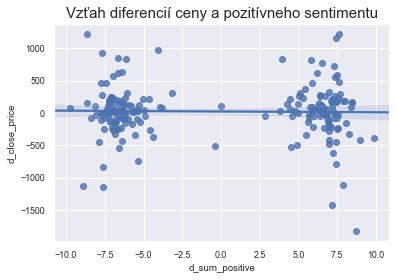

In [194]:
df = pd.read_csv("data_f.csv")
scaler = MinMaxScaler()
df['d_close_price']= np.append(np.diff(df['close_price']), 0)
df['d_sum_positive']= np.insert(np.diff(df['sum_positive']), 0, 1)

#df['d_close_price'] = scaler.fit_transform(df[['d_close_price']])
#df['d_sum_positive'] = scaler.fit_transform(df[['d_sum_positive']])

df['log'] = df['d_sum_positive']
#df['log'] = np.where(df['log']==0.0, df['log'].mean, df['log'])
df['d_sum_positive'] = np.where(df['log']>=0, np.log(df['log']), np.log(np.abs(df['log']))*-1)

x = ((df.d_sum_positive))
y = ((df.d_close_price))
ax = sns.regplot(x=x, y = y ).set_title('Vzťah diferencií ceny a pozitívneho sentimentu', fontsize = 15)
print("Pearson correlation: %.3f" % x.corr(y))

In [219]:
df = pd.read_csv("data_f.csv")
print(df.sum_positive.mean())
print(df.sum_negative.mean())
print(df.sum_positive.min())
print(df.sum_negative.min())
df['d_close_price']= np.append(np.diff(df['close_price']), 0)
dff = df.loc[ (df['d_close_price'] <= 20.0) & (df['d_close_price'] >= -20.0) ]
print(dff.shape)
print(dff.sum_compound.mean())

#sum_positive = 8300
#sum_negative = 2900
#compound 18098

9744.471291457283
3389.2802462311574
6022.0109999999995
1943.379
(19, 149)
18098.172042105263


C:\Users\kriza\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


Pearson correlation: -0.087


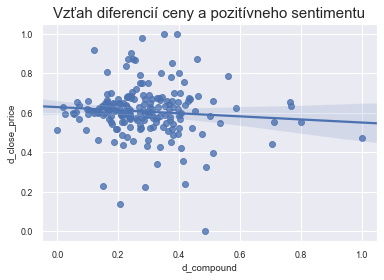

In [244]:
df = pd.read_csv("data_f.csv")
scaler = MinMaxScaler()
df['d_close_price']= np.append(np.diff(df['close_price']), 0)
df['d_close_price']= scaler.fit_transform(df[['d_close_price']])
df['d_tweet_volume']= np.insert(np.diff(df['tweet_volume']), 0,0)
df['d_sum_positive']= df.sum_positive - 8300
df['d_sum_negative']= df.sum_negative - 2900
df['d_compound'] = df.tweet_volume * (df.avg_sum_nonzero_positive-df.avg_sum_nonzero_negative)
df['d_compound'] = np.where(df['d_compound']>=0, np.log(df['d_compound']), np.log(np.abs(df['d_compound']))*-1)
df = df.loc[ (df['d_compound'] >7.5) ]
df.d_compound=scaler.fit_transform(df[['d_compound']])
x = ((df.d_compound))
y = ((df.d_close_price))
ax = sns.regplot(x=x, y = y ).set_title('Vzťah diferencií ceny a pozitívneho sentimentu', fontsize = 15)
print("Pearson correlation: %.3f" % x.corr(y))

# NEW BEGIN

Pearson correlation: -0.529


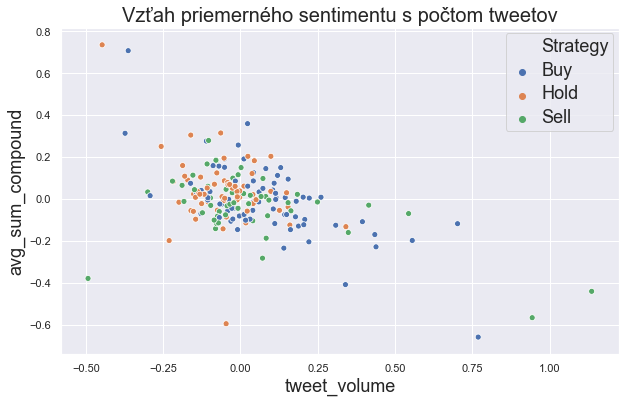

In [21]:
df = pd.read_csv("data_f.csv")
df['pricePercentage'] = df.close_price.pct_change() * 100
df["Strategy"] = np.nan
df['Strategy'] = np.where((df.pricePercentage > 1.2),'Buy',df.Strategy)
df['Strategy'] = np.where((df.pricePercentage <-1.2),'Sell',df.Strategy)
df['Strategy'] = np.where(((df.pricePercentage >=-1.2) & (df.pricePercentage <=1.2)),'Hold',df.Strategy)
df['Strategy'] = np.where(df.Strategy == 'nan', 'Hold', df.Strategy)

df['avg_sum_compound'] = df.avg_sum_compound.pct_change()
df['tweet_volume'] = df.tweet_volume.pct_change()

df = df[df['avg_sum_compound'] < 1 ]
df = df[df['avg_sum_compound'] > -1 ]

p = df.Strategy
x = (((df.tweet_volume)))
y = (((df.avg_sum_compound)))

plt.figure(figsize=(10, 6))
plt.xlabel("tweet_volume", fontsize=18)
plt.ylabel("avg_sum_compound", fontsize=18)

ax = sns.scatterplot(x=x, y = y, hue=p )
ax.set_title('Vzťah priemerného sentimentu s počtom tweetov', fontsize = 20)


plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') #

print("Pearson correlation: %.3f" % x.corr(y))

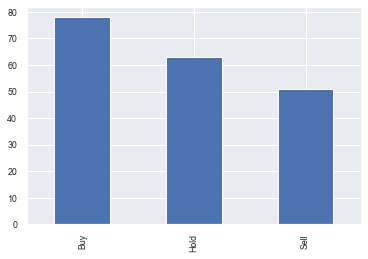

In [165]:
df['target_rise_fall'].value_counts().plot(kind='bar')

0.13274193026192593
Pearson correlation: -0.301


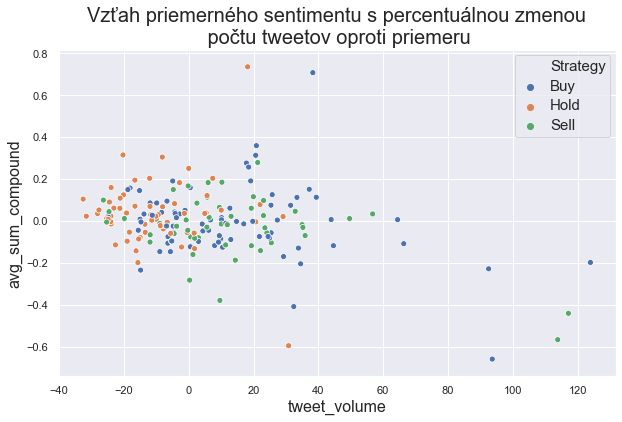

In [24]:
df = pd.read_csv("data_f.csv")
df['pricePercentage'] = df.close_price.pct_change() * 100
df["Strategy"] = np.nan
df['Strategy'] = np.where((df.pricePercentage > 1.2),'Buy',df.Strategy)
df['Strategy'] = np.where((df.pricePercentage <-1.2),'Sell',df.Strategy)
df['Strategy'] = np.where(((df.pricePercentage >=-1.2) & (df.pricePercentage <=1.2)),'Hold',df.Strategy)
df['Strategy'] = np.where(df.Strategy == 'nan', 'Hold', df.Strategy)

df['avg_sum_compound'] = df.avg_sum_compound.pct_change()

df['tweet_volume'] = ((df['tweet_volume'] / df.tweet_volume.median())-1)*100


df = df[df['avg_sum_compound'] < 1 ]
df = df[df['avg_sum_compound'] > -1 ]

p = df.Strategy
x = (((df.tweet_volume)))
y = (((df.avg_sum_compound)))

plt.figure(figsize=(10, 6))
plt.xlabel("tweet_volume", fontsize=16)
plt.ylabel("avg_sum_compound", fontsize=16)

ax = sns.scatterplot(x=x, y = y, hue=p )
ax.set_title('Vzťah priemerného sentimentu s percentuálnou zmenou\n počtu tweetov oproti priemeru', fontsize = 20)

plt.setp(ax.get_legend().get_texts(), fontsize='15') 
plt.setp(ax.get_legend().get_title(), fontsize='30')

print(df.tweet_volume.median())

print("Pearson correlation: %.3f" % x.corr(y))

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterplot'

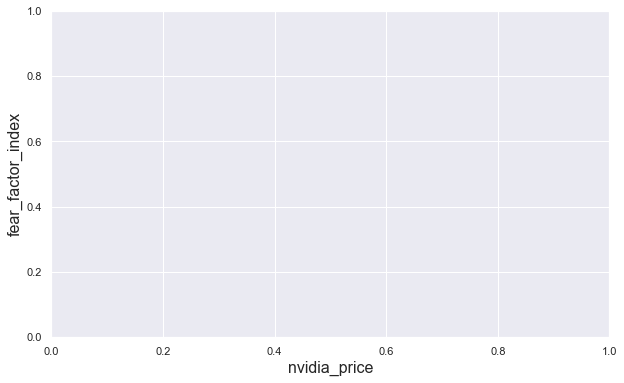

In [23]:
df = pd.read_csv("data_f.csv")
df['pricePercentage'] = ((df.close_price/df.open_price)-1) * 100
df["target_rise_fall"] = np.nan
df['target_rise_fall'] = np.where((df.pricePercentage > 1.2),'Buy',df.target_rise_fall)
df['target_rise_fall'] = np.where((df.pricePercentage <-1.2),'Sell',df.target_rise_fall)
df['target_rise_fall'] = np.where(((df.pricePercentage >=-1.2) & (df.pricePercentage <=1.2)),'Hold',df.target_rise_fall)
df['target_rise_fall'] = np.where(df.target_rise_fall == 'nan', 'Hold', df.target_rise_fall)

df['avg_sum_compound'] = df.avg_sum_compound.pct_change()

df['tweet_volume'] = ((df['tweet_volume'] / df.tweet_volume.median())-1)*100

p = df.target_rise_fall
x = (((df.tweet_volume)))
y = (((df.num_of_transaction)))

plt.figure(figsize=(10, 6))
plt.xlabel("nvidia_price", fontsize=16)
plt.ylabel("fear_factor_index", fontsize=16)

ax = plt.scatterplot(x=x, y = y, hue=p )
ax.set_title('Vzťah priemerného sentimentu s percentuálnou zmenou\n počtu tweetov oproti priemeru', fontsize = 20)

plt.setp(ax.get_legend().get_texts(), fontsize='15') 
plt.setp(ax.get_legend().get_title(), fontsize='30')

print(df.tweet_volume.median())

print("Pearson correlation: %.3f" % x.corr(y))

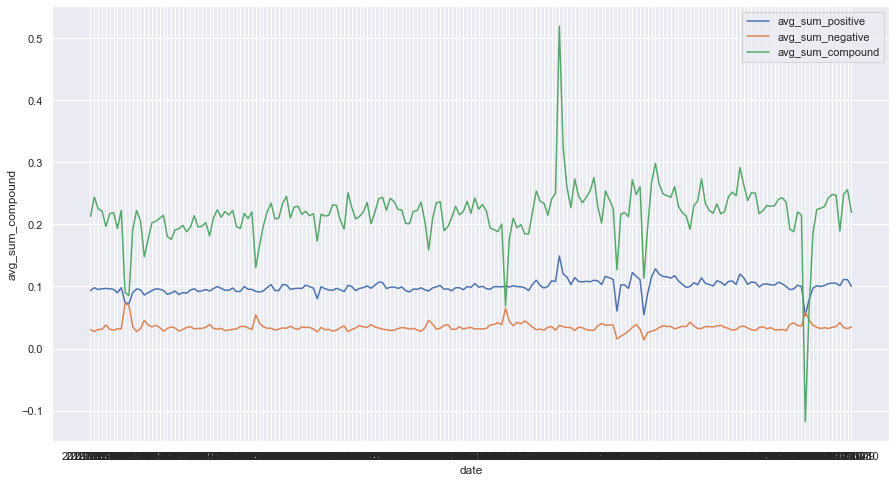

In [15]:
df = pd.read_csv("data_f.csv")
plt.figure(figsize=(15, 8))
sns.lineplot(x = df['date'], y=df['avg_sum_positive'], label = 'avg_sum_positive')
#sns.lineplot(x = df['date'], y=df['sum_neutral_mul_follow'], label = 'sum_neutral_mul_follow')
sns.lineplot(x = df['date'], y=df['avg_sum_negative'], label = 'avg_sum_negative')
sns.lineplot(x = df['date'], y=df['avg_sum_compound'], label = 'avg_sum_compound')

In [28]:
df.head()


date  open_price  close_price  market_volume    market_cap  \
0  2019-03-26     3969.23      3985.08   1.070768e+10  7.018415e+10   
1  2019-03-27     3984.24      4087.07   1.089713e+10  7.198785e+10   
2  2019-03-28     4087.58      4069.11   9.353916e+09  7.167900e+10   
3  2019-03-29     4068.30      4098.37   1.091867e+10  7.220209e+10   
4  2019-03-30     4092.14      4106.66   9.732688e+09  7.235519e+10   

   dayOfWeek_sin  dayOfWeek_cos  is_Weekend  num_of_transaction  \
0       0.781831       0.623490           0              366415   
1       0.974928      -0.222521           0              383186   
2       0.433884      -0.900969           0              393698   
3      -0.433884      -0.900969           0              369817   
4      -0.974928      -0.222521           1              377783   

   d_num_of_transaction  ...  xrp_open_price  xrp_close_price   xrp_volume  \
0                     0  ...        0.303808         0.305060  761000017.0   
1                 16771  ...        0.305421         0.312465  781951318.0   
2                 10512  ...        0.312383         0.309246  677929379.0   
3                -23881  ...        0.309269         0.307929  854583316.0   
4                  7966  ...        0.307655         0.310632  929122633.0   

   xrp_market_cap  d_xrp_open_price  d_xrp_close_price  d_xrp_volume  \
0    1.272299e+10          0.000000           0.000000           0.0   
1    1.303183e+10          0.001613           0.007405    20951301.0   
2    1.289761e+10          0.006962          -0.003219  -104021939.0   
3    1.284265e+10         -0.003114          -0.001317   176653937.0   
4    1.295539e+10         -0.001614           0.002703    74539317.0   

   d_xrp_market_cap  pricePercentage  target_rise_fall  
0               0.0              NaN              Hold  
1       308841275.0         2.559296               Buy  
2      -134220158.0        -0.439435              Hold  
3       -54962215.0         0.719076              Hold  
4       112745850.0         0.202276              Hold  

[5 rows x 150 columns]

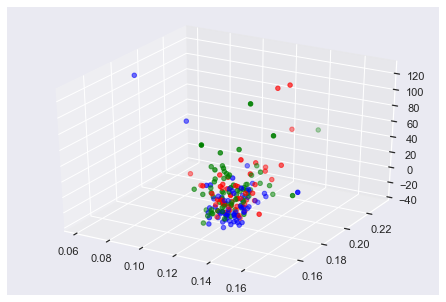

In [17]:
df = pd.read_csv("data_f.csv")

df['pricePercentage'] = ((df.close_price/df.open_price)-1) * 100
df["target_rise_fall"] = np.nan
df['target_rise_fall'] = np.where((df.pricePercentage > 1.2),'Buy',df.target_rise_fall)
df['target_rise_fall'] = np.where((df.pricePercentage <-1.2),'Sell',df.target_rise_fall)
df['target_rise_fall'] = np.where(((df.pricePercentage >=-1.2) & (df.pricePercentage <=1.2)),'Hold',df.target_rise_fall)
df['target_rise_fall'] = np.where(df.target_rise_fall == 'nan', 'Hold', df.target_rise_fall)
df['avg_sum_compound'] = df.avg_sum_compound.pct_change()
df['tweet_volume'] = ((df['tweet_volume'] / df.tweet_volume.median())-1)*100

fig = plt.figure()
ax = Axes3D(fig)

p = df.target_rise_fall
x = (((df.avg_sum_nonzero_negative)))
y = (((df.avg_sum_nonzero_positive)))
z = (((df.tweet_volume)))

colors = {'Buy':'green', 'Sell':'red', 'Hold':'blue'}
ax.scatter(x, y, z, c = df['target_rise_fall'].apply(lambda x: colors[x]))
plt.show()